In [19]:
#libraries used 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# URLs for the Red and White wine datasets
red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Load the data 
red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

# Add a column to distinguish them before merging
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine them into one "Master" dataframe
df = pd.concat([red_wine, white_wine])

print(f"Dataset loaded! Total rows: {len(df)}")
print(df.head())

Dataset loaded! Total rows: 6497
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  

In [4]:
red_wine.shape

(1599, 13)

In [5]:
white_wine.shape

(4898, 13)

In [6]:
df_red = pd.DataFrame(red_wine)
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [7]:
df_white = pd.DataFrame(white_wine)
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [9]:
# separating 
# - Low:       0-4 (4 exclusive)
# - Medium Low: 4-5 ( exclusive)
# - Medium High: 6-7 (6 exclusive)
# - High:      6-7 (7 exclusive)
# - Very High: 7-10 (10 exclusive)

bins = [0, 4, 6, 7, 8, 10]
choices = ['Low', 'Medium Low', 'Medium High', 'High', 'Very High']

df_red['quality_category'] = pd.cut(df_red['quality'], bins=bins, labels=choices, right=False)

# Verify the distribution of the new quality categories
print(df_red['quality_category'].value_counts())

quality_category
Medium Low     734
Medium High    638
High           199
Very High       18
Low             10
Name: count, dtype: int64


In [10]:
#Converting categorical into numerical, dropping 'type' column 
df_red_cleaned = df_red.drop(columns = ['type']) 

#Initializing the encoder
le = LabelEncoder()

#Putting the encoded quality category into one column 
df_red_cleaned['quality_category_encoded'] = le.fit_transform(df_red_cleaned['quality_category'])

In [11]:
# This calculates the correlation for all numeric columns & correlation of features to target, which is the quality category 
correlation_matrix = df_red_cleaned.corr(numeric_only=True)
print(correlation_matrix['quality_category_encoded'].sort_values(ascending=False))

quality_category_encoded    1.000000
volatile acidity            0.301117
total sulfur dioxide        0.206129
density                     0.144189
chlorides                   0.095838
free sulfur dioxide         0.076258
pH                          0.021487
residual sugar             -0.031954
fixed acidity              -0.126322
citric acid                -0.196529
sulphates                  -0.214449
alcohol                    -0.429057
quality                    -0.753303
Name: quality_category_encoded, dtype: float64


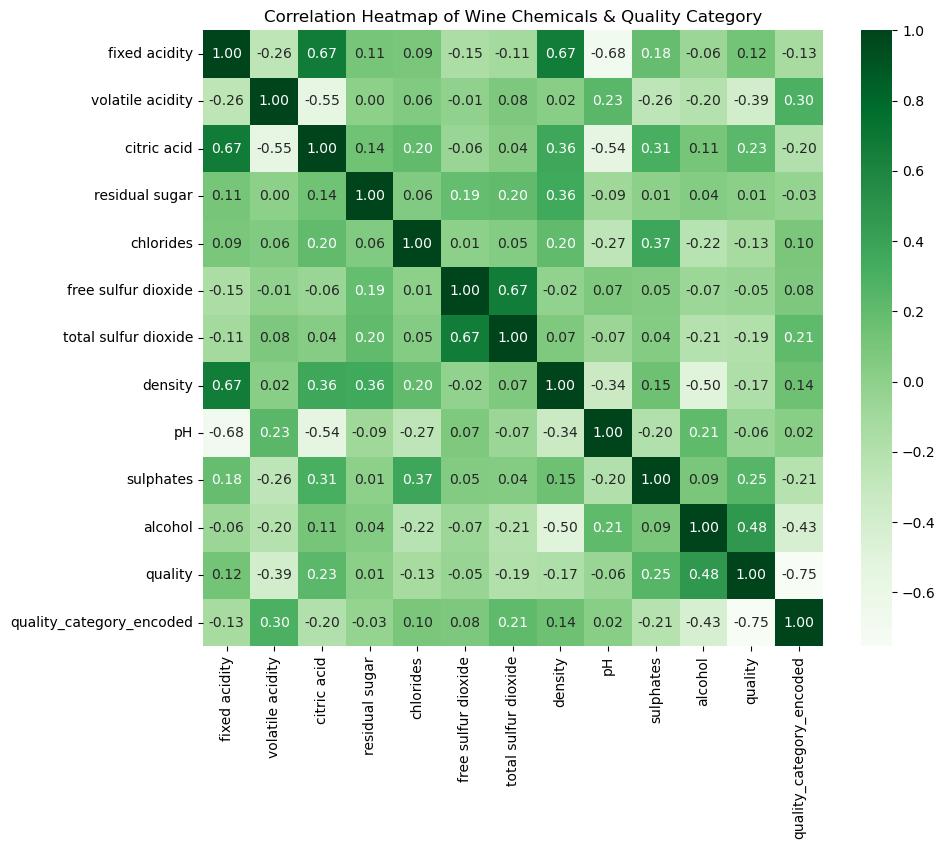

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Heatmap of Wine Chemicals & Quality Category")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15908\3256204280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_links.values, y=target_links.index, palette='Greens_r')


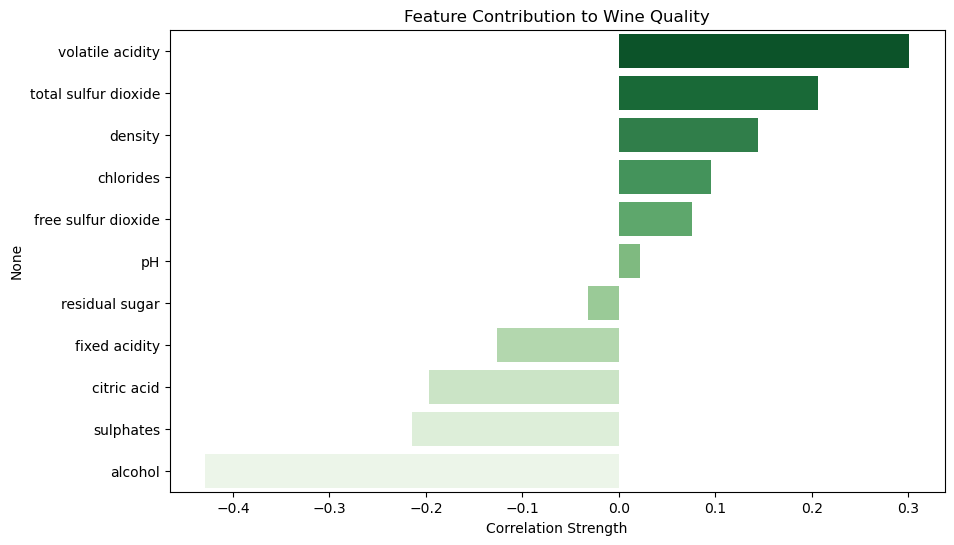

In [13]:
#Correlation bar graph to make it presentation friendly 
correlations = df_red_cleaned.corr(numeric_only=True)
target_links = correlations['quality_category_encoded'].drop(['quality_category_encoded', 'quality'], errors='ignore')
target_links = target_links.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_links.values, y=target_links.index, palette='Greens_r')
plt.title('Feature Contribution to Wine Quality')
plt.xlabel('Correlation Strength')
plt.show()

In [14]:
#Separating Feature columns from target one for red wine 
features = df_red_cleaned.drop(columns = ["quality_category_encoded", "quality_category"])
target = df_red_cleaned["quality_category_encoded"]
df_red_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_category_encoded
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium Low,3
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Medium Low,3
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Medium Low,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Medium High,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium Low,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Medium Low,3
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medium High,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medium High,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Medium Low,3


In [15]:
#Train/Test Separation 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [16]:
#MinMax Scaling & Transformation 0-1
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm, X_test_norm

(array([[0.36283186, 0.39041096, 0.31      , ..., 0.22699387, 0.49230769,
         0.6       ],
        [0.13274336, 0.06164384, 0.4       , ..., 0.13496933, 0.53846154,
         0.6       ],
        [0.55752212, 0.18493151, 0.47      , ..., 0.23312883, 0.21538462,
         0.6       ],
        ...,
        [0.2300885 , 0.34246575, 0.06      , ..., 0.10429448, 0.16923077,
         0.4       ],
        [0.2920354 , 0.05479452, 0.35      , ..., 0.26380368, 0.53846154,
         0.8       ],
        [0.10619469, 0.11643836, 0.26      , ..., 0.10429448, 0.78461538,
         0.6       ]], shape=(1279, 12)),
 array([[0.27433628, 0.30136986, 0.08      , ..., 0.17791411, 0.18461538,
         0.6       ],
        [0.28318584, 0.26027397, 0.17      , ..., 0.06748466, 0.16923077,
         0.4       ],
        [0.53982301, 0.37671233, 0.22      , ..., 0.37423313, 0.23076923,
         0.6       ],
        ...,
        [0.32743363, 0.32876712, 0.25      , ..., 0.09815951, 0.21538462,
         0.4    

In [17]:
#using KNN to train the model, checking for accuracy 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.93125


In [20]:
#AdaBoosting 
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),n_estimators=100)
ada_reg.fit(X_train_norm, y_train)
AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),n_estimators=100)
pred = ada_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 0.0
RMSE 0.0
R2 score 1.0


In [21]:
#Gradient Boosting 
gb_reg = GradientBoostingRegressor(max_depth=20,n_estimators=100)
gb_reg.fit(X_train_norm, y_train)
GradientBoostingRegressor(max_depth=20)
pred = gb_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 2.0084267300461617e-05
RMSE 6.968381546331708e-10
R2 score 0.9999999992938872


In [22]:
#Random Forest 
forest = RandomForestRegressor(n_estimators=100,max_depth=20)
forest.fit(X_train_norm, y_train)
RandomForestRegressor(max_depth=20)
pred = forest.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(y_test, pred))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 0.0
RMSE 0.0
R2 score 1.0


In [23]:
#Bagging & Pasting 
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),n_estimators=100,max_samples = 1000)
bagging_reg.fit(X_train_norm, y_train)
BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),max_samples=1000, n_estimators=100)
pred = bagging_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(y_test, pred))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 0.0
RMSE 0.0
R2 score 1.0
